# The Challenge:

For the 2018 season, the NFL revised their kickoff rules in an effort to reduce the risk of injury during those plays. By examining injury reports, player position and velocity data, and game video, they were able to understand the game-play circumstances that may exacerbate the risk of injury to players.

This comprehensive review showed that over the course of all games during the 2015-2017 seasons, the kickoff represented only six percent of plays but 12 percent of concussions. Players had approximately four times the risk of concussion on returned kickoffs compared to running or passing plays. The changes to the kickoff rule aim to address the components that posed the most risk, like the use of a two-man wedge.

Therefore, my data analysis is aiming at what are the factors that contribute to the concussion happened during kickoffs, and possible suggestions on the football rules that may lower the risk of injury.

# Questions I'm interested in answering:

1) What factors may cause punting?

The specific rule for the end of second quarter, switching possession after the second quarter according to which team has the ball at the beginning of the game. 

Unable to make enough yardage after 4 tries and it's not enough to make the field goal.

2) What are the sources that causes concussion?

Helmet-to-body and Helmet-to-helmet

3) What suggestions could be made that decrease the concussion during punt?

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns

%matplotlib inline

In [50]:
# importing play information data, Player punt data, Video Review data that contains concussion
! pwd

/Users/lshi/Desktop/Term 2/Project1


In [51]:
play_info = pd.read_csv('/Users/lshi/Desktop/Term 2/Project1/nfl/play_information.csv')
play_info.shape
play_info.head()

,Season_Year,Season_Type,GameKey,Game_Date,Week,PlayID,Game_Clock,YardLine,Quarter,Play_Type,Poss_Team,Home_Team_Visit_Team,Score_Home_Visiting,PlayDescription
0,2016,Pre,2,08/13/2016,2,191,12:30,LA 47,1,Punt,LA,LA-DAL,0 - 7,"(12:30) J.Hekker punts 52 yards to DAL 1, Cent..."
1,2016,Pre,2,08/13/2016,2,1132,12:08,LA 29,2,Punt,LA,LA-DAL,7 - 21,"(12:08) J.Hekker punts 51 yards to DAL 20, Cen..."
2,2016,Pre,2,08/13/2016,2,1227,10:01,DAL 18,2,Punt,DAL,LA-DAL,7 - 21,"(10:01) C.Jones punts 40 yards to LA 42, Cente..."
3,2016,Pre,2,08/13/2016,2,1864,00:21,DAL 46,2,Punt,LA,LA-DAL,7 - 24,"(:21) J.Hekker punts 31 yards to DAL 15, Cente..."
4,2016,Pre,2,08/13/2016,2,2247,10:26,DAL 15,3,Punt,DAL,LA-DAL,14 - 24,"(10:26) M.Wile punts 40 yards to LA 45, Center..."


In [59]:
# check if there's NaN
play_info.isnull().sum()

# there's no NaN

Season_Year             0
Season_Type             0
GameKey                 0
Game_Date               0
Week                    0
PlayID                  0
Game_Clock              0
YardLine                0
Quarter                 0
Play_Type               0
Poss_Team               0
Home_Team_Visit_Team    0
Score_Home_Visiting     0
PlayDescription         0
dtype: int64

In [52]:
play_info['Quarter'].value_counts()

2    1815
1    1628
4    1622
3    1588
5      28
Name: Quarter, dtype: int64

Since the Play Information data set only contains Punt data, I want to take a look if there's difference in the number of punt given the quarters.

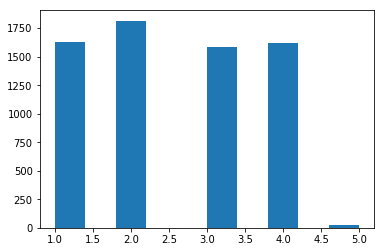

In [53]:
plt.hist(play_info['Quarter']);

From the above histogram, the number of punt happening seems to be relatively homogeneous across quarters, with a slightly higher number during the second quarter and the first quarter.

I believe that makes sense because when the second quarter ends, the team who doesn't have the possession of the ball at the beginning of the game will gain possession, regardless which team has the ball at the end of the second quarter. Such a design would make the teams less motivated to keep the posession of the ball, hence increasing the likelihood of punting the ball by the end of the second quarter.

In [54]:
play_info['Poss_Team'].value_counts()

NYG    254
JAX    244
NYJ    238
LA     233
MIA    231
HST    229
BUF    224
BLT    224
CLV    222
SF     219
DEN    218
ARZ    215
OAK    214
SEA    212
CHI    211
CIN    211
TEN    210
MIN    207
KC     205
PIT    204
NE     203
IND    202
GB     201
CAR    194
PHI    193
WAS    190
DET    189
TB     182
NO     180
DAL    173
ATL    168
LAC    100
SD      81
Name: Poss_Team, dtype: int64

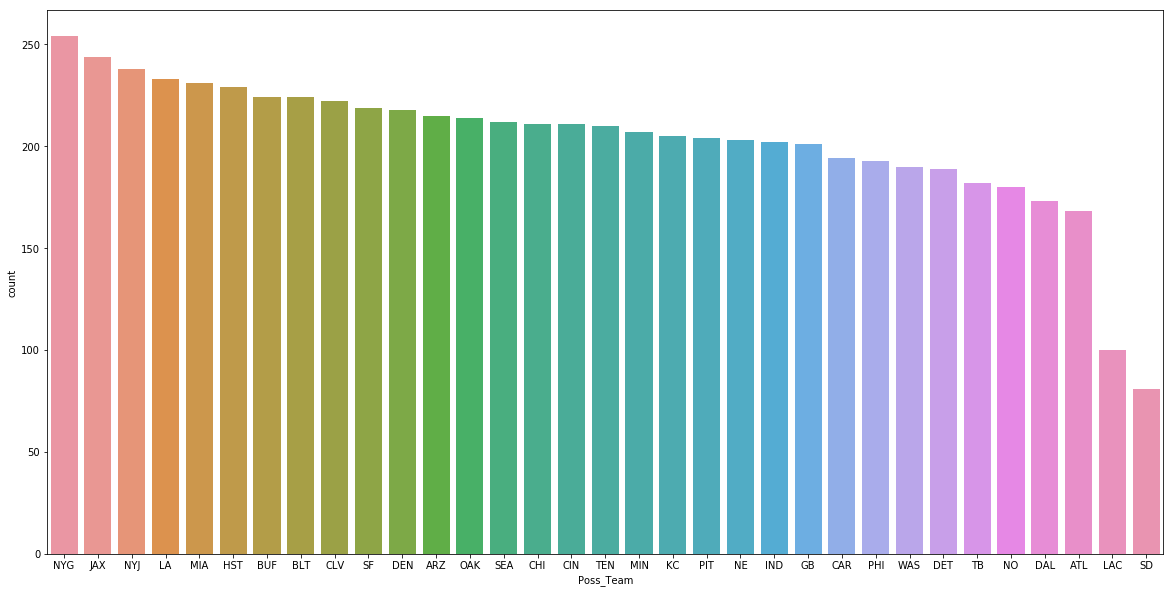

In [55]:
plt.figure(figsize=(20,10))
sns.countplot(data = play_info, x = 'Poss_Team', order = play_info['Poss_Team'].value_counts().index);

From the plot above, NYG, JAX and NYJ are more likely to punt when they have the possession of the balls, versus ATL, LAC and SD.

Teams that have higher number of punts are more likely to perform worse than teams with lower number of punts, because punting happens when the possession team doesn't reach enough yardage within 4 tries. The argument could be backed up by New England Patriots (a team that has won 5 superbowls since 2001) being at the lower half of the histgram. 


In [56]:
player_punt = pd.read_csv('/Users/lshi/Desktop/Term 2/Project1/nfl/player_punt_data.csv')
player_punt.shape
player_punt.head()

,GSISID,Number,Position
0,32069,36,SS
1,30095,11,WR
2,31586,22,FS
3,29520,35,SS
4,30517,51,OLB


In [60]:
# check if there's NaN
player_punt.isnull().sum()
# there's no NaN

GSISID      0
Number      0
Position    0
dtype: int64

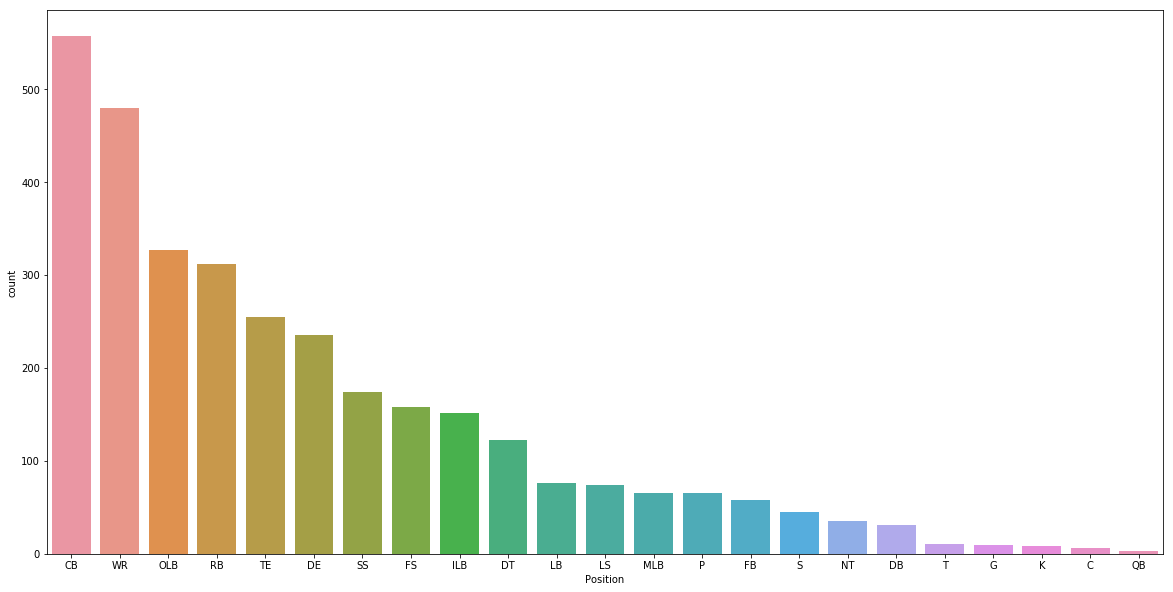

In [57]:
plt.figure(figsize=(20,10))
sns.countplot(data = player_punt, x = 'Position', order = player_punt['Position'].value_counts().index);

In [69]:
video_review = pd.read_csv('/Users/lshi/Desktop/Term 2/Project1/nfl/video_review.csv')
video_review.shape

(37, 10)

In [70]:
video_review.head()

,Season_Year,GameKey,PlayID,GSISID,Player_Activity_Derived,Turnover_Related,Primary_Impact_Type,Primary_Partner_GSISID,Primary_Partner_Activity_Derived,Friendly_Fire
0,2016,5,3129,31057,Tackling,No,Helmet-to-body,32482,Tackled,No
1,2016,21,2587,29343,Blocked,No,Helmet-to-helmet,31059,Blocking,No
2,2016,29,538,31023,Tackling,No,Helmet-to-body,31941,Tackled,No
3,2016,45,1212,33121,Tackling,No,Helmet-to-body,28249,Tackled,No
4,2016,54,1045,32444,Blocked,No,Helmet-to-body,31756,Blocked,Yes


In [71]:
video_review.isnull().sum()

Season_Year                         0
GameKey                             0
PlayID                              0
GSISID                              0
Player_Activity_Derived             0
Turnover_Related                    0
Primary_Impact_Type                 0
Primary_Partner_GSISID              3
Primary_Partner_Activity_Derived    2
Friendly_Fire                       2
dtype: int64

In [72]:
# drop the rows where there's NaN
video_review = video_review.dropna(subset = ['Primary_Partner_GSISID', 'Primary_Partner_Activity_Derived', 'Friendly_Fire'], axis = 0)

In [73]:
video_review.isnull().sum()

Season_Year                         0
GameKey                             0
PlayID                              0
GSISID                              0
Player_Activity_Derived             0
Turnover_Related                    0
Primary_Impact_Type                 0
Primary_Partner_GSISID              0
Primary_Partner_Activity_Derived    0
Friendly_Fire                       0
dtype: int64

In [74]:
video_review.shape

(34, 10)

In [75]:
# Turnover had no relation to concussion
video_review['Turnover_Related'].value_counts()

No    34
Name: Turnover_Related, dtype: int64

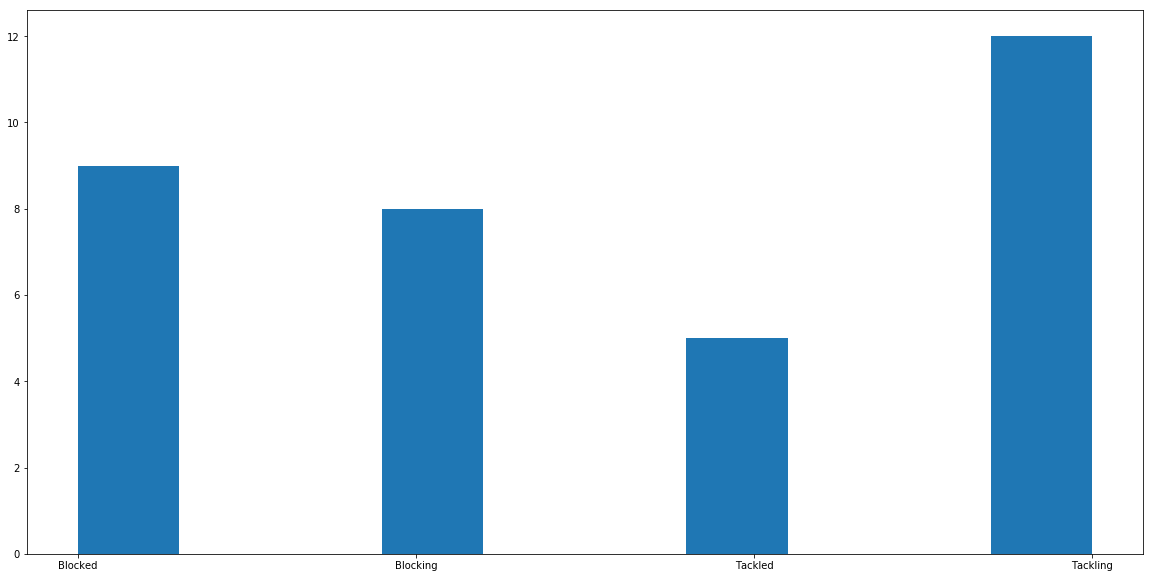

In [76]:
# Player activity during primary injury causing event
plt.figure(figsize=(20,10))
plt.hist(video_review['Player_Activity_Derived']);

From the above, Tackling is the one that causes the most concussion, followed by Blocked, Blocking and Tackled.
Hence, rules that focusing on the safety of tackling should be reenforced by NFL.

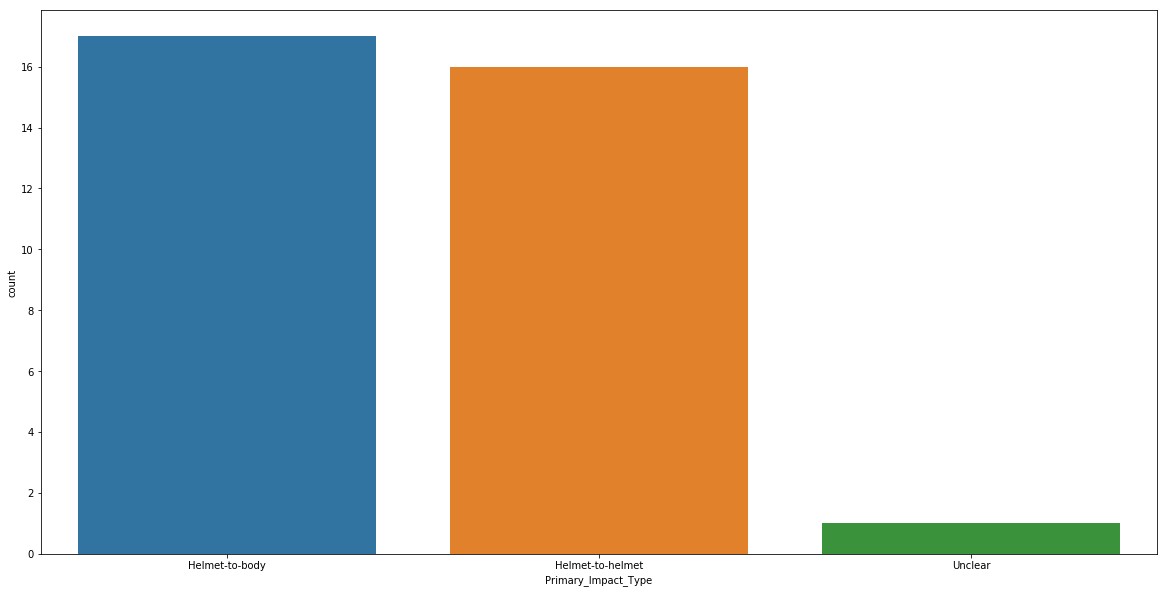

In [79]:
plt.figure(figsize=(20,10))
sns.countplot(data = video_review, x = 'Primary_Impact_Type', order = video_review['Primary_Impact_Type'].value_counts().index);

What is interesting is that the top two reasons that cause concussion is the Helmet-to-body and Helmet-to-helmet, not the Helmet-to-ground. 

My reasoning is that it is easier to practice not to get hurt when the player hits the ground, than practicing such a play with another player because it is too risky during practice. Hence, players are less likely to protect themselves during the game against another player, which results in such a high occurance of concussion.

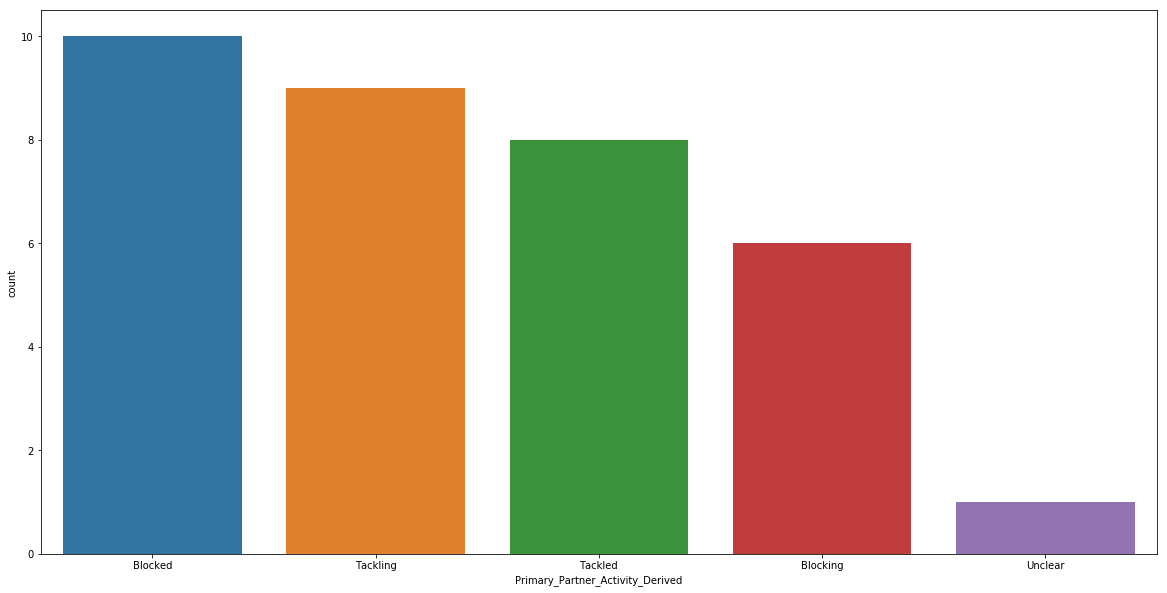

In [81]:
plt.figure(figsize=(20,10))
sns.countplot(data = video_review, x = 'Primary_Partner_Activity_Derived', order = video_review['Primary_Partner_Activity_Derived'].value_counts().index);

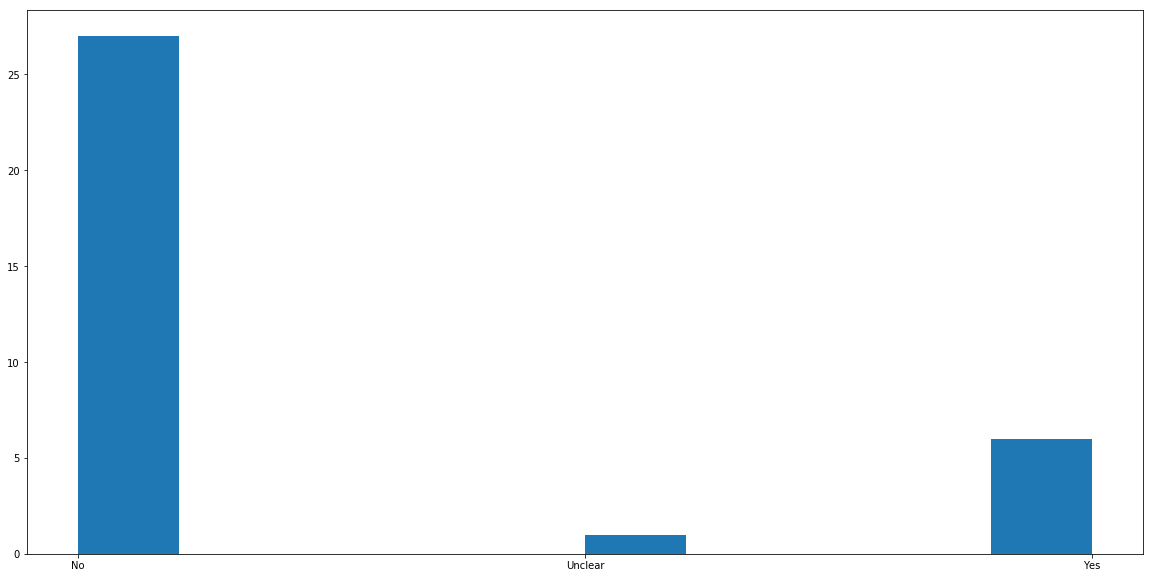

In [77]:
plt.figure(figsize=(20,10))
plt.hist(video_review['Friendly_Fire']);

The above histogram is about whether or not the players who hit the helmets together that caused concussion are on the same team. And it is clear that most of the players are not on the same team, which makes sense, because players are more aggressive towards the other team as they are trying to win.

Hence, a more strict rule on aggressive attack should be enforced to prevent the injury.